<a href="https://colab.research.google.com/github/pauladel/labs/blob/main/02_scraping/homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. I chose to do my assignment on the page of boats. I was interested in the fields price, year, and brand.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://charlottesville.craigslist.org/search/boo#search=1~gallery~0~0'
raw = requests.get(url,headers=header)

2. Extract data

In [4]:
from bs4 import BeautifulSoup as soup # HTML parser
bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings

In [5]:
import re # Regular expressions

brands = ['rinker', 'coleman','carolina skiff','dagger','lincoln','trophy','grady white','yamaha','crestliner','pelican']

data = [] # We'll save our listings in this object
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']
    # Get brand from the title string:
    words = title.split()
    hits = [word for word in words if word in brands] # Find brands in the title
    if len(hits) == 0:
        brand = 'missing'
    else:
        brand = hits[0]
    # Get years from title string:
    regex_search = re.search(r'20[0-9][0-9]|19[0-9][0-9]', title ) # Find year references
    if regex_search is None: # If no hits, record year as missing value
        year = np.nan
    else: # If hits, record year as first match
        year = regex_search.group(0)
    #
    data.append({'title':title,'price':price,'year':year,'link':link,'brand':brand})

3. Wrangling, eda, plots

In [6]:
## Wrangle the data
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['year'] = pd.to_numeric(df['year'],errors='coerce')
df['age'] = 2025-df['year']
print(df.shape)
df.to_csv('craigslist_cville_boats.csv') # Save data in case of a disaster
df.head()

(35, 6)


,title,price,year,link,brand,age
0,jon boat and vee bottom boat,200,NaN,https://charlottesville.craigslist.org/boa/d/a...,missing,NaN
1,14ft jon boat crestliner,2850,NaN,https://charlottesville.craigslist.org/boa/d/d...,crestliner,NaN
2,wave armor drive on pwc and boat ports,2200,NaN,https://charlottesville.craigslist.org/boa/d/g...,missing,NaN
3,triton tr-175 fishing boat,6500,NaN,https://charlottesville.craigslist.org/boa/d/p...,missing,NaN
4,outboard motor for sale!!!,1600,NaN,https://charlottesville.craigslist.org/boa/d/s...,missing,NaN


count        35.000000
mean      14412.257143
std       28953.917913
min           0.000000
25%         200.000000
50%        2200.000000
75%       12999.500000
max      134999.000000
Name: price, dtype: float64


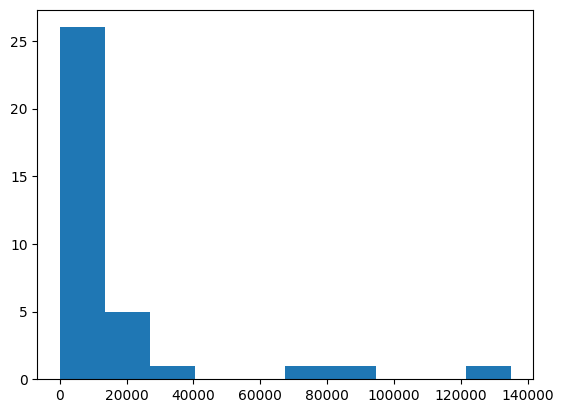

count     7.000000
mean     12.000000
std       5.887841
min       4.000000
25%       7.500000
50%      14.000000
75%      15.000000
max      21.000000
Name: age, dtype: float64


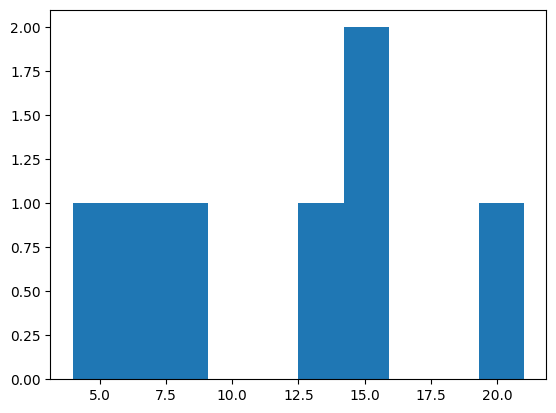

In [7]:
# EDA for price and age:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()
print(df['age'].describe())
df['age'].hist(grid=False)
plt.show()

In [8]:
# Price by brand:
df.loc[:,['price','brand']].groupby('brand').describe()

price                                                         \
           count          mean           std      min      25%      50%   
brand                                                                     
coleman      1.0    135.000000           NaN    135.0    135.0    135.0   
crestliner   2.0   8425.000000   7884.240610   2850.0   5637.5   8425.0   
dagger       1.0    175.000000           NaN    175.0    175.0    175.0   
lincoln      1.0    999.000000           NaN    999.0    999.0    999.0   
missing     23.0  15611.826087  31737.479860      1.0    215.0   1600.0   
pelican      1.0    200.000000           NaN    200.0    200.0    200.0   
rinker       2.0   1250.000000   1767.766953      0.0    625.0   1250.0   
trophy       1.0  18999.000000           NaN  18999.0  18999.0  18999.0   
yamaha       3.0  35166.333333  43157.079377  10000.0  10250.0  10500.0   

                               
                75%       max  
brand                          
coleman       135.0     135.0  
crestliner  11212.5   14000.0  
dagger        175.0     175.0  
lincoln       999.0     999.0  
missing     15497.0  134999.0  
pelican       200.0     200.0  
rinker       1875.0    2500.0  
trophy      18999.0   18999.0  
yamaha      47749.5   84999.0

In [9]:
# Age by brand:
df.loc[:,['age','brand']].groupby('brand').describe()

age                                                
           count   mean       std   min    25%   50%   75%   max
brand                                                           
coleman      0.0    NaN       NaN   NaN    NaN   NaN   NaN   NaN
crestliner   1.0  14.00       NaN  14.0  14.00  14.0  14.0  14.0
dagger       0.0    NaN       NaN   NaN    NaN   NaN   NaN   NaN
lincoln      0.0    NaN       NaN   NaN    NaN   NaN   NaN   NaN
missing      4.0  11.75  7.719024   4.0   6.25  11.0  16.5  21.0
pelican      0.0    NaN       NaN   NaN    NaN   NaN   NaN   NaN
rinker       0.0    NaN       NaN   NaN    NaN   NaN   NaN   NaN
trophy       1.0  15.00       NaN  15.0  15.00  15.0  15.0  15.0
yamaha       1.0   8.00       NaN   8.0   8.00   8.0   8.0   8.0

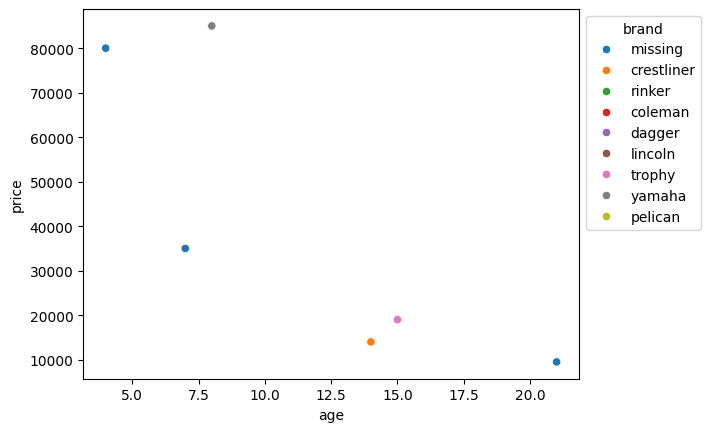

In [10]:
ax = sns.scatterplot(data=df, x='age', y='price',hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


           log_price   log_age
log_price   6.660991 -0.438288
log_age    -0.438288  0.331166
           log_price   log_age
log_price   1.000000 -0.896454
log_age    -0.896454  1.000000


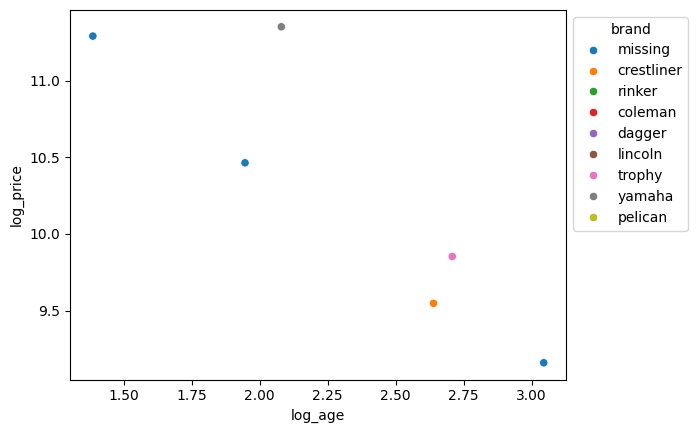

In [11]:
df['log_price'] = np.log(df['price'])
df['log_age'] = np.log(df['age'])

ax = sns.scatterplot(data=df, x='log_age', y='log_price',hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

print(df.loc[:,['log_price','log_age']].cov())
print(df.loc[:,['log_price','log_age']].corr())

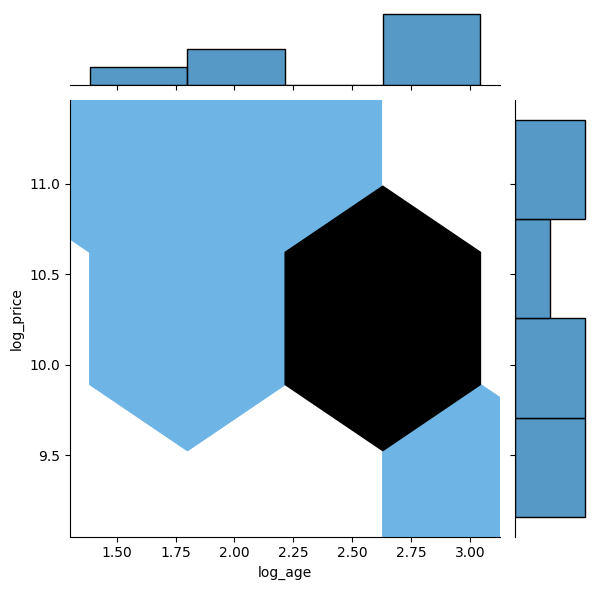

In [12]:
sns.jointplot(data=df, x='log_age', y='log_price',kind='hex')